In [18]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, AutoencoderKL  
from PIL import Image                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [3]:
print(torch.cuda.is_available())
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

True


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
generator = torch.Generator(device).manual_seed(42)  
#faster with scheduler 20 to 25 inference steps, default one is 50
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

#better quality with autoencoderKL
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to(device)
#responsible for encoding and decoding images into and from a latent space representation
pipe.vae = vae

c:\Users\kakat\anaconda3\envs\dev\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

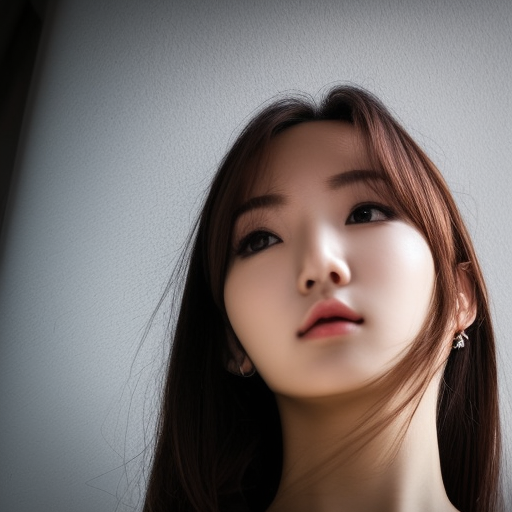

In [26]:
input = "portrait photo of a kpop girl star"
#negative_prompt = "poorly drawn,cartoon, 2d, sketch, cartoon, drawing, anime, disfigured, bad art, deformed, poorly drawn, extra limbs, close up, b&w, weird colors, blurry"

#details
details = ", light make up, clean and smooth face , side profile, looking away, joyful eyes"
#cues
cues = " 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta"

prompt = input + details + cues
pipe.enable_attention_slicing()                                                                                                                                                                                           
                                                                                                                                                                                                                                              
image = pipe(prompt, generator=generator, num_inference_steps=25).images[0]                                                                                                                                                                   
image    